In [2]:
from datetime import datetime as dt, timedelta as td
import models as m
from sqlalchemy import and_, func, or_, extract

In [45]:
start = dt(2017, 9, 18)
end = dt(2017, 10, 15)
minutes_delta = 15

trips = []
while start < end:
    if start.isoweekday() not in range(1,6):
        start += td(days=1)
        continue
    if (start.hour == 0 and start.minute > 30) or start.hour < 5:
        start += td(minutes=minutes_delta)
        continue
#     print(start.isoformat())
    trips.append(m.s.query(m.Trip).filter(and_(
        m.Trip.departure_time >= start.isoformat(),
        m.Trip.departure_time <= (start + td(minutes=minutes_delta)).isoformat(),
        )).count())
    start += td(minutes=minutes_delta)

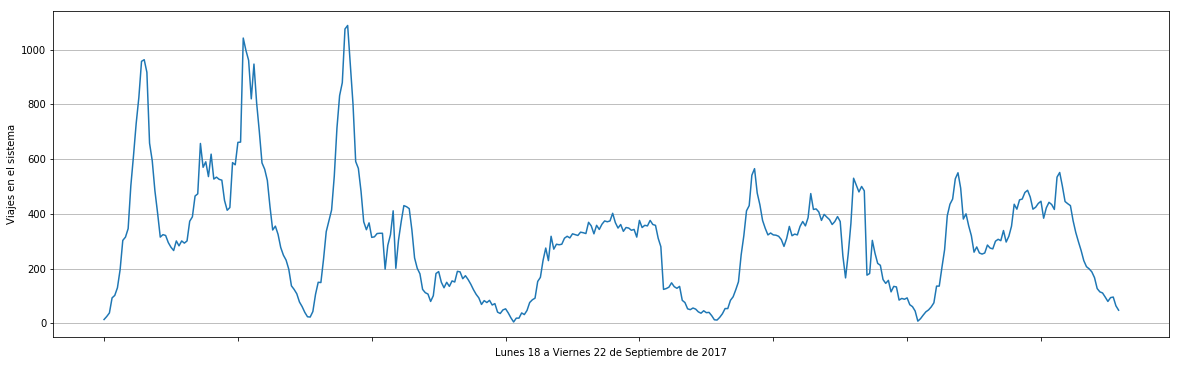

In [56]:
from matplotlib import pyplot

fig = pyplot.figure(figsize=(20,6))
ax = fig.add_subplot(111)
ax.set_xlabel("Lunes 18 a Viernes 22 de Septiembre de 2017")
ax.set_ylabel('Viajes en el sistema')
ax.set_xticklabels([])
ax.yaxis.grid()
ax.plot(trips[:380])
pyplot.show()

In [8]:
with open("trips_19_sept.csv", "w") as f:
    [f.write("\n%s" % l) for l in trips]

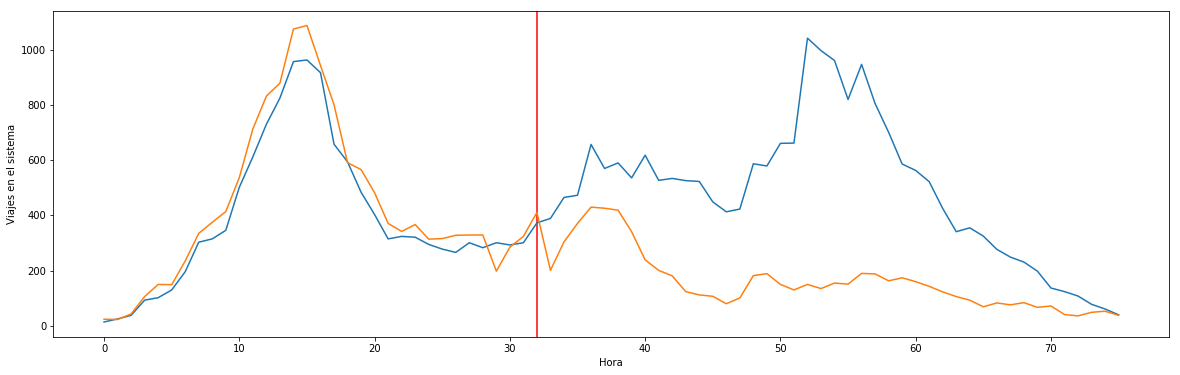

In [61]:
fig = pyplot.figure(figsize=(20,6))
ax = fig.add_subplot(111)
ax.set_xlabel('Hora')
ax.set_ylabel('Viajes en el sistema')
# pyplot.axis([0, 24, 0, 0.03])
# pyplot.xticks(x, labels, rotation='vertical')
# ax.set_xticklabels(["0", "5:00", "7:30", "10:00", "12:30", "15:00", "17:30", "20:00", "22:30"])
ax.axvline(x=32, color="r")
for d in range(2):
    ax.plot(trips[76*d:76*(d+1)])
pyplot.show()

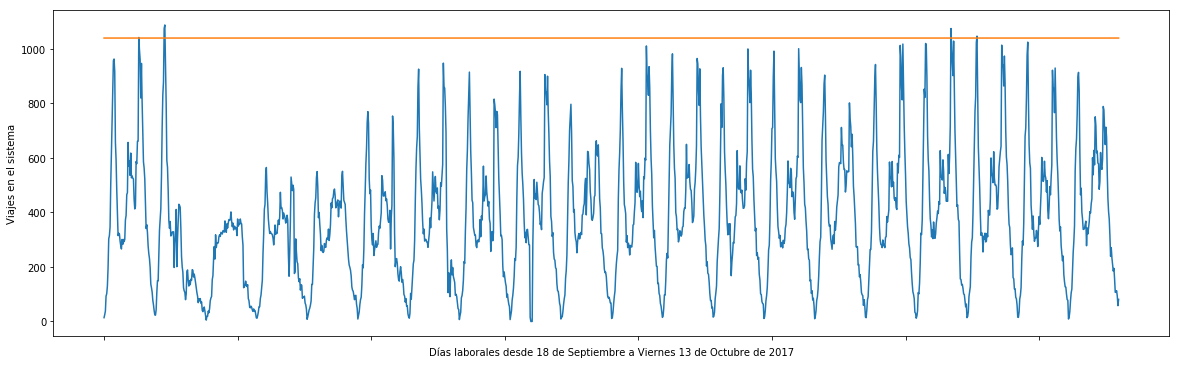

In [55]:
fig = pyplot.figure(figsize=(20,6))
ax = fig.add_subplot(111)
ax.set_xlabel("Días laborales desde 18 de Septiembre a Viernes 13 de Octubre de 2017")
ax.set_ylabel('Viajes en el sistema')
ax.set_xticklabels([])
ax.plot(trips)
ax.plot([1040] * len(trips))
pyplot.show()